# Insper - Informação Georreferenciada

## Avaliação Final

### SEU NOME: Francisco Pinheiro Janela

---

# Contextualização dos dados

## Índice de Envelhecimento

O Índice de Envelhecimento, divulgado por instituições como a Fundação SEADE (Sistema Estadual de Análise de Dados), é uma medida demográfica utilizada para avaliar a proporção de pessoas idosas em relação à população mais jovem em uma determinada área. Esse índice é importante para compreender a dinâmica populacional e as tendências de envelhecimento de uma sociedade.

## Como o índice é calculado


O Índice de Envelhecimento é geralmente calculado pela seguinte fórmula:


$\text{Índice de Envelhecimento} = \left( \frac{\text{Número de pessoas com 60 anos ou mais}}{\text{Número de pessoas com menos de 15 anos}} \right) \times 100
$

Nesta fórmula:

- O numerador representa o número de pessoas consideradas idosas, normalmente definidas como aquelas com 60 anos ou mais.
- O denominador é o número de jovens, normalmente definidos como pessoas com menos de 15 anos.
- O resultado é multiplicado por 100 para expressar o índice como um número por cada 100 jovens.


## Interpretação do índice


Um índice alto indica uma maior proporção de idosos em relação aos jovens, sugerindo uma população mais envelhecida. Isso pode ter implicações importantes para políticas de saúde, previdência social e planejamento urbano.
Um índice baixo sugere uma proporção maior de jovens em relação aos idosos, indicando uma população mais jovem.


## Importância do índice


O Índice de Envelhecimento é crucial para entender as mudanças demográficas e para o planejamento de recursos e serviços. Por exemplo, uma população com alto índice de envelhecimento pode exigir mais investimentos em saúde geriátrica, enquanto uma população mais jovem pode demandar mais recursos para educação e emprego.




## Sua tarefa

A partir de dados da fundação SEADE, você vai precisar desenvolver uma análise espacial sobre a autocorrelação dos índices de envelhecimento dos municípios paulistas. A seguir há instruções específicas para o desenvolvimento da sua prova.

## 1. Download dos dados

Execute a célula abaixo para obter os dados necessários. Se houver problema em fazer o download, no blackboard há um arquivo zipado com todos os arquivos necessários para a prática.

In [3]:
!curl https://repositorio.seade.gov.br/dataset/9bb4f8ef-f1a4-4734-92a2-814cfc8d0974/resource/7148b853-a7d9-4057-a672-4fdbe1a8e570/download/indice_envelhecimento.zip --output indice_envelhecimento.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.0M  100 19.0M    0     0  17.4M      0  0:00:01  0:00:01 --:--:-- 17.5M


In [9]:
!unzip indice_envelhecimento.zip

Archive:  indice_envelhecimento.zip
 extracting: indice_envelhecimento.cpg  
  inflating: indice_envelhecimento.dbf  
  inflating: indice_envelhecimento.prj  
  inflating: indice_envelhecimento.qpj  
  inflating: indice_envelhecimento.shp  
  inflating: indice_envelhecimento.shx  
  inflating: indice_envelhecimento.xlsx  


O arquivo que você vai utilizar para a análise é o `indice_envelhecimento.shp`. Faça a leitura dele com o geopandas (não se esqueça de instalar o geopandas e demais pacotes no colab, conforme visto em aula).

In [38]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import matplotlib.pyplot as plt

In [11]:
gdf_indice_envelhecimento = gpd.read_file('indice_envelhecimento.shp')

In [12]:
gdf_indice_envelhecimento.head()

,Cod_ibge,Nome,Rotulo,Area_Km2,indenvelhe,geometry
0,3500105,Adamantina,Adamantina,411.987,154.69,"POLYGON ((-51.17735 -21.69213, -51.17716 -21.6..."
1,3500204,Adolfo,Adolfo,211.055,162.95,"POLYGON ((-49.74715 -21.29637, -49.74682 -21.2..."
2,3500303,Aguai,Aguaí,474.554,81.49,"POLYGON ((-47.23298 -22.05409, -47.23289 -22.0..."
3,3500402,Aguas da Prata,Águas da Prata,142.961,162.75,"POLYGON ((-46.75758 -21.84763, -46.75750 -21.8..."
4,3500501,Aguas de Lindoia,Águas de Lindóia,60.126,98.82,"POLYGON ((-46.66020 -22.47948, -46.66018 -22.4..."


In [16]:
gdf_indice_envelhecimento.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
gdf_indice_envelhecimento = gdf_indice_envelhecimento.to_crs(epsg=31983)

In [25]:
gdf_indice_envelhecimento.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

A variável de interesse é 'indenvelhe'. Ela representa nosso índice de envelhecimento.

## Tarefa 1: Faça um mapa temático sobre essa variável. Escolha representa-la em escala de quantis (k = 5).

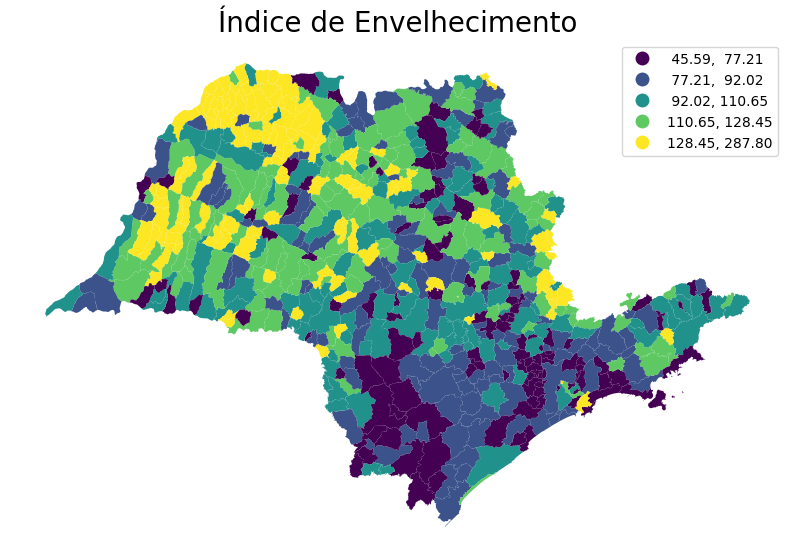

In [29]:
fig, grafico = plt.subplots(figsize=(10, 10))
gdf_indice_envelhecimento.plot(ax=grafico, column='indenvelhe', scheme='quantiles', cmap='viridis', legend=True, k=5)
grafico.set_title('Índice de Envelhecimento', fontdict={'fontsize': 20})
grafico.set_axis_off()
plt.show()

## Tarefa 2: Garantindo que os dados estejam em uma projeção cuja unidade de medida é o metro, obtenha a análise de autocorrelação espacial, determinando regiões significantes de LL, LH, HL e HH.  

- Calcule o índice I global de Moran. O que você pode compreender sobre ele?

- Determine os clusters LISA para encontrar os LL, LH, HL e HH. Algo chama a sua atenção?

- Com base na explicação do que é esse índice, há algo que chama a sua atenção na distribuição espacial dos idosos no estado de SP?

In [33]:
# Calculando o Índice de Moran Global
from esda.moran import Moran
from splot.esda import plot_moran
from pysal.lib import weights

w = weights.KNN.from_dataframe(gdf_indice_envelhecimento, k = 5)

moran = Moran(gdf_indice_envelhecimento['indenvelhe'], w)
moran.I

0.5228386927566573

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


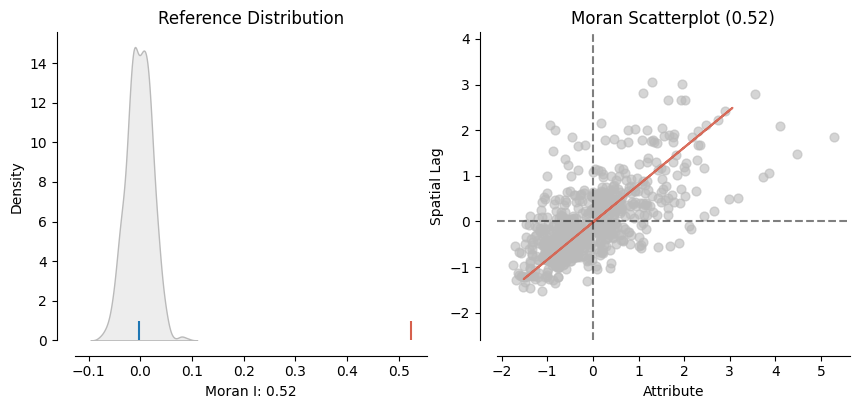

In [34]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

#### Interpretando o índice de Moran global

O resultado obtido para o índice de Moran global indica um certo nível de autocorrelação positiva, ou seja, existe uma tendência de valores semelhantes dos índices de envelhecimento de se agruparem no espaço.

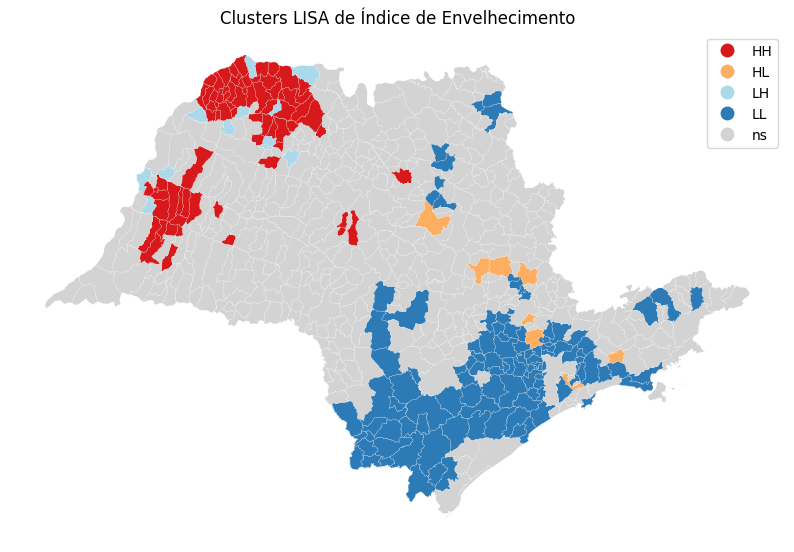

In [37]:
# Determinando os clusters LISA
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

moran_loc = Moran_Local(gdf_indice_envelhecimento['indenvelhe'], w)

lisa_cluster(moran_loc, gdf_indice_envelhecimento, p=0.05, figsize = (10,10))
plt.title('Clusters LISA de Índice de Envelhecimento')
plt.show()

#### Interpretanto os clusters LISA indicados

Chama a atenção as localizações de clusters HH no Noroeste, onde os municípios com índice de envelhecimento alto se agrupam com outros de mesmo valor, e LL no Sudeste, onde os municípios com índice de envelhecimento baixo se agrupam, localizações opostas do estado.

Com base no significado dos clusters LISA, percebe-se que o número de idosos comparado ao número de jovens é maior na região Noroeste, e menor na Sudeste. Isso pode representar que a distribuição de idosos no estado de São Paulo possui maior concentração no interior, para as regiões do Noroeste, enquanto as familias com filhos jovens se localizem mais na região Sudeste.